![sslogo](https://github.com/stratascratch/stratascratch.github.io/raw/master/assets/sslogo.jpg)

# Exploring your data

In [1]:
import pandas as pd
import numpy  as np
import psycopg2 as ps
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
host_name = 'db-strata.stratascratch.com'
dbname = 'db_strata'
port = '5432'
# TODO Write your username and database password in the following two variables
user_name = 'ankit082006' #enter username
pwd = 'ofkMQPktC' #enter your database password found in the profile tab in Strata Scratch

try:
    conn = ps.connect(host=host_name,database=dbname,user=user_name,password=pwd,port=port)
except ps.OperationalError as e:
    raise e
else:
    print('Connected!')

Connected!


In [0]:
def get_dataset(dataset_name):
    #Write SQL below to pull datasets 
    cur = conn.cursor()
    cur.execute(""" 
                SELECT *  FROM {0}; 
                """.format(dataset_name))
    data = cur.fetchall()
    colnames = [desc[0] for desc in cur.description] 
    conn.commit()

    #create the pandas dataframe
    dataframe = pd.DataFrame(data, columns=colnames)

    #close the connection
    cur.close()
    
    return dataframe

In [0]:
patient_list = get_dataset("patient_list")

## Get an overview of your data

### Quick look at the data

In [5]:
patient_list.head()

,patient_id,physician_last_name,age,height_inches,weight_lbs,id
0,1,Smith,47,70,200.0,1
1,2,Yamamoto,29,74,220.0,2
2,3,Goldberg,62,76,132.0,3
3,4,Yamamoto,37,63,107.0,4
4,5,Chase,53,71,115.0,5


### Column names

In [6]:
patient_list.columns

Index(['patient_id', 'physician_last_name', 'age', 'height_inches',
       'weight_lbs', 'id'],
      dtype='object')

### Column types

In [7]:
patient_list.dtypes

patient_id              int64
physician_last_name    object
age                     int64
height_inches           int64
weight_lbs             object
id                      int64
dtype: object

### Quick information about the dataset

In [9]:
patient_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
patient_id             77 non-null int64
physician_last_name    77 non-null object
age                    77 non-null int64
height_inches          77 non-null int64
weight_lbs             77 non-null object
id                     77 non-null int64
dtypes: int64(4), object(2)
memory usage: 3.7+ KB


### Count NaNs (Missing values)

Pandas provides a method `isnull` for dataframes and series.
- when called on a dataframe returns a dataframe of boolean values
- when called on a series returns a series of boolean values

To count we just `sum` the results of that.
True is considered 1 and False is considered 0.

In [10]:
patient_list.isnull().sum()

patient_id             0
physician_last_name    0
age                    0
height_inches          0
weight_lbs             0
id                     0
dtype: int64

In our dataset we got 0 missing values which is cool but is a lie.

This works only if all columns are of type np.float64 but we have an object type column (`weight_lbs`) which actually has missing values so the lesson is don't trust this until you see the data types.

### Visualize your data with styles

Each pandas dataframe has a `style` property which has a few useful method
- highlight_null(null_color, subset=[])
- highlight_min(color, subset)
- highlight_max(color, subset)

The parameters are:
- color : string name of color
- null_color : string name of color
- subset : list of column names you want to apply the style on

In [11]:
patient_list.style\
           .highlight_max(color='green', subset=['age', 'height_inches'])\
           .highlight_min(color='red', subset=['age', 'height_inches'])

,patient_id,physician_last_name,age,height_inches,weight_lbs,id
0,1,Smith,47,70,200.0,1
1,2,Yamamoto,29,74,220.0,2
2,3,Goldberg,62,76,132.0,3
3,4,Yamamoto,37,63,107.0,4
4,5,Chase,53,71,115.0,5
5,6,Smith,44,67,190.0,6
6,7,Chase,55,61,150.0,7
7,8,Yamamoto,37,72,172.0,8
8,9,Honeydew,24,61,169.0,9
9,10,Smith,36,76,,10


### Quick fix for weight_lbs column

Convert from strings with empty string as NaN to floats.

We do this so we can have proper NaNs which we can visualize.

In [13]:
patient_list.weight_lbs = np.where(patient_list.weight_lbs == '', 
                                   np.nan, 
                                   patient_list.weight_lbs)

patient_list.weight_lbs = patient_list.weight_lbs.astype(np.float64)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [15]:
patient_list.head(10)

,patient_id,physician_last_name,age,height_inches,weight_lbs,id
0,1,Smith,47,70,200.0,1
1,2,Yamamoto,29,74,220.0,2
2,3,Goldberg,62,76,132.0,3
3,4,Yamamoto,37,63,107.0,4
4,5,Chase,53,71,115.0,5
5,6,Smith,44,67,190.0,6
6,7,Chase,55,61,150.0,7
7,8,Yamamoto,37,72,172.0,8
8,9,Honeydew,24,61,169.0,9
9,10,Smith,36,76,NaN,10


In [16]:
patient_list.dtypes

patient_id               int64
physician_last_name     object
age                      int64
height_inches            int64
weight_lbs             float64
id                       int64
dtype: object

In [17]:
patient_list.style.highlight_null(null_color='blue')

,patient_id,physician_last_name,age,height_inches,weight_lbs,id
0,1,Smith,47,70,200,1
1,2,Yamamoto,29,74,220,2
2,3,Goldberg,62,76,132,3
3,4,Yamamoto,37,63,107,4
4,5,Chase,53,71,115,5
5,6,Smith,44,67,190,6
6,7,Chase,55,61,150,7
7,8,Yamamoto,37,72,172,8
8,9,Honeydew,24,61,169,9
9,10,Smith,36,76,nan,10


## Exploratory data analysis

### Frequency counts

Use the `value_counts()` method.

We see Dr. Smith had the most work with 16 patients.

In [18]:
patient_list.physician_last_name.value_counts()

Smith       16
Honeydew    15
Payne       12
Goldberg    12
Chase       12
Yamamoto    10
Name: physician_last_name, dtype: int64

#### Fraction counts

Divide the frequency counts by the number of patients (which is the number of rows = patient_list.shape[0])

In [19]:
patient_list.physician_last_name.value_counts() / patient_list.shape[0]

Smith       0.207792
Honeydew    0.194805
Payne       0.155844
Goldberg    0.155844
Chase       0.155844
Yamamoto    0.129870
Name: physician_last_name, dtype: float64

#### Frequency counts height 

This column is of type integer but you can take frequency counts of integers.

In [20]:
patient_list.height_inches.value_counts()

72    8
61    7
76    6
71    6
62    6
65    5
74    5
73    5
70    5
63    4
68    4
67    4
69    4
66    3
64    2
60    2
75    1
Name: height_inches, dtype: int64

#### Frequency counts of weight

After we turned weight_lbs into a proper float we can take frequency on it too, so float columns work too.

In [21]:
patient_list.weight_lbs.value_counts().head()

154.0    3
209.0    2
220.0    2
168.0    2
181.0    2
Name: weight_lbs, dtype: int64

#### What about those NaNs

When we called value_counts like above it ignored them but if we pass `dropna=False` it will list them too.

We see there are 10 patients who did not step on the scale.

In [22]:
patient_list.weight_lbs.value_counts(dropna=False).head()

NaN      10
154.0     3
151.0     2
209.0     2
180.0     2
Name: weight_lbs, dtype: int64

### Summary statistics for numeric columns

In [23]:
patient_list.describe()

,patient_id,age,height_inches,weight_lbs,id
count,77.000000,77.000000,77.000000,67.000000,77.000000
mean,39.000000,41.675325,68.259740,166.447761,39.000000
std,22.371857,13.795920,4.891998,33.003803,22.371857
min,1.000000,18.000000,60.000000,102.000000,1.000000
25%,20.000000,30.000000,64.000000,141.500000,20.000000
50%,39.000000,40.000000,69.000000,171.000000,39.000000
75%,58.000000,53.000000,72.000000,192.500000,58.000000
max,77.000000,69.000000,76.000000,220.000000,77.000000


## Visual Exploratory Data Analysis

### Histograms for Continous Data

We select the column of interest (e.g. weight_lbs) and call the plot method on it.
- The first parameter is the name of plot we want to make ("hist")
- bins is the number of bins we want our histogram to have.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


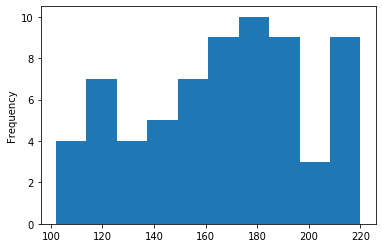

In [24]:
patient_list.weight_lbs.plot('hist', bins=10)
plt.show()

### Boxplots

### Basic boxplots

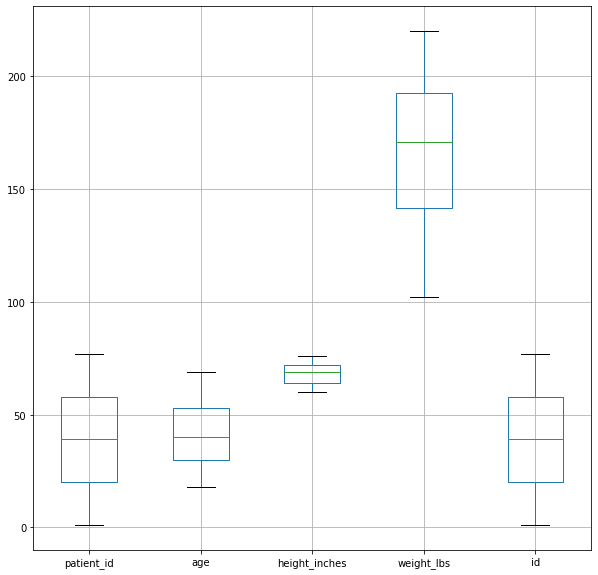

In [25]:
patient_list.boxplot(figsize=(10, 10))
plt.show()

### Grouped boxplots

We want to see age box plots grouped by physician.
- column is the name of the column we want to make the boxplots for
- by is the name of the column by which to group.

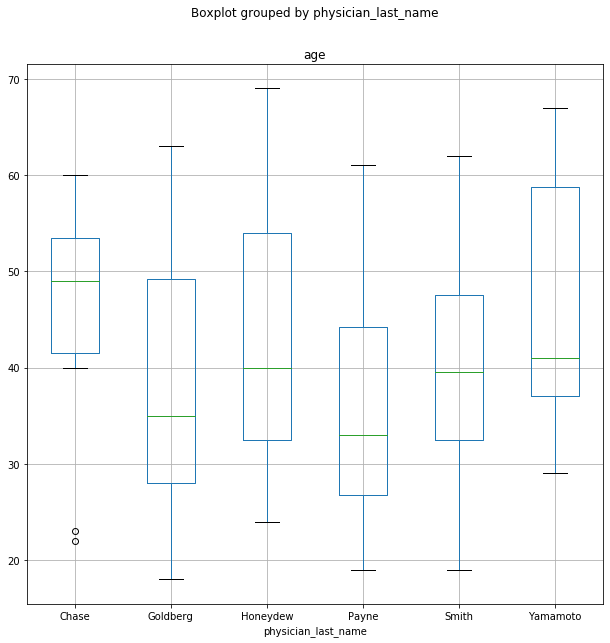

In [26]:
patient_list.boxplot(column="age", by="physician_last_name", figsize=(10, 10))
plt.show()

## Scatter plots

We can call the plot method on the dataframe directly:
- x is the column name for X axis
- y is the column name for Y axis
- kind is now "scatter" for scatter plot
- figsize controls the size

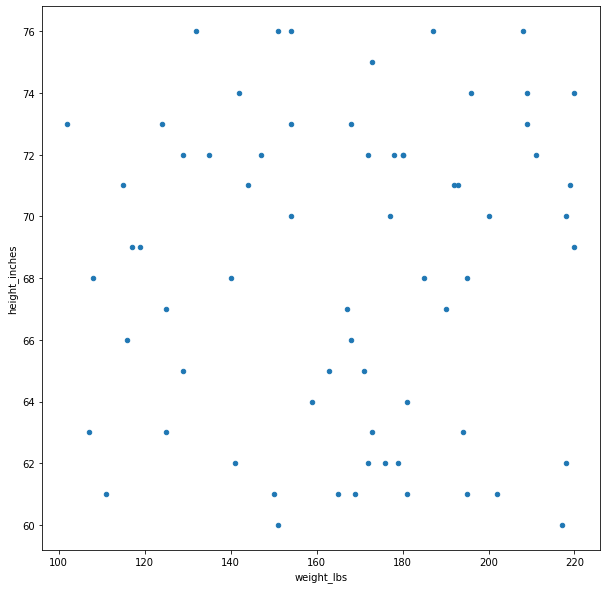

In [27]:
patient_list.plot(x='weight_lbs', y='height_inches', kind='scatter', figsize=(10, 10))
plt.show()